In [97]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3
#import sklearn
from sklearn import cluster
from sklearn.preprocessing import StandardScaler
%matplotlib inline

# Análisis de los archivos .blast 

In [98]:
archivo_nombre = "1.fasta_ExpandedVsNp.blast"
#archivo_nombre = "pscplos17.blast"
#archivo_nombre = "vueltalos17.blast"
#archivo_nombre = "2.fasta_ExpandedVsNp.blast"
ruta_archivo = "/home/csar/Proyectos/Posdoc/ALL_curado.fasta_MiBIG_DB.faa_los17/blast/" + archivo_nombre



df = pd.read_csv(ruta_archivo, sep = "\t", names = ['query', 'subject',
           'pc_identity', 'aln_length', 'mismatches', 'gaps_opened',
           'query_start', 'query_end', 'subject_start', 'subject_end',
           'e_value', 'bitscore'], engine = 'python')
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1731 entries, 0 to 1730
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   query          1731 non-null   object 
 1   subject        1731 non-null   object 
 2   pc_identity    1731 non-null   float64
 3   aln_length     1731 non-null   int64  
 4   mismatches     1731 non-null   int64  
 5   gaps_opened    1731 non-null   int64  
 6   query_start    1731 non-null   int64  
 7   query_end      1731 non-null   int64  
 8   subject_start  1731 non-null   int64  
 9   subject_end    1731 non-null   int64  
 10  e_value        1731 non-null   float64
 11  bitscore       1731 non-null   float64
dtypes: float64(3), int64(7), object(2)
memory usage: 162.4+ KB


In [99]:
df.head()

,query,subject,pc_identity,aln_length,mismatches,gaps_opened,query_start,query_end,subject_start,subject_end,e_value,bitscore
0,gi|749927.13.1890|749927.13|NC_014318.1|Glyoxy...,BGC0000135_BAK64657,38.34,313,175,6,16,314,20,328,9.000000e-48,166.0
1,gi|749927.13.1890|749927.13|NC_014318.1|Glyoxy...,BGC0001016_AAO62580,36.31,314,172,7,16,314,32,332,3.000000e-43,154.0
2,gi|749927.13.1890|749927.13|NC_014318.1|Glyoxy...,BGC0001017_AAF00955,35.03,314,176,8,16,314,31,331,3.000000e-41,149.0
3,gi|749927.13.1890|749927.13|NC_014318.1|Glyoxy...,BGC0001636_BBC83963,33.44,302,179,6,24,307,29,326,1.000000e-40,147.0
4,gi|749927.13.1890|749927.13|NC_014318.1|Glyoxy...,BGC0001705_ATP76237,34.71,314,177,7,16,314,31,331,2.000000e-40,146.0


In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1731 entries, 0 to 1730
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   query          1731 non-null   object 
 1   subject        1731 non-null   object 
 2   pc_identity    1731 non-null   float64
 3   aln_length     1731 non-null   int64  
 4   mismatches     1731 non-null   int64  
 5   gaps_opened    1731 non-null   int64  
 6   query_start    1731 non-null   int64  
 7   query_end      1731 non-null   int64  
 8   subject_start  1731 non-null   int64  
 9   subject_end    1731 non-null   int64  
 10  e_value        1731 non-null   float64
 11  bitscore       1731 non-null   float64
dtypes: float64(3), int64(7), object(2)
memory usage: 162.4+ KB


In [101]:
df.describe()

,pc_identity,aln_length,mismatches,gaps_opened,query_start,query_end,subject_start,subject_end,e_value,bitscore
count,1731.000000,1731.000000,1731.000000,1731.000000,1731.000000,1731.000000,1731.000000,1731.000000,1.731000e+03,1731.000000
mean,33.569965,239.569613,139.048527,5.498556,71.458694,298.403235,81.200462,311.465627,2.006521e-07,110.368804
std,8.688751,50.385579,35.145231,2.329349,46.334782,19.997031,47.449660,29.003096,3.497756e-06,69.968903
min,21.690000,73.000000,0.000000,0.000000,1.000000,200.000000,1.000000,197.000000,0.000000e+00,43.900000
25%,29.740000,220.000000,123.000000,4.000000,41.000000,288.000000,47.000000,298.000000,6.000000e-30,77.400000
50%,31.920000,244.000000,144.000000,6.000000,66.000000,299.000000,73.000000,318.000000,2.000000e-22,96.700000
75%,34.635000,275.500000,163.000000,7.000000,92.000000,313.000000,104.000000,327.000000,8.000000e-16,119.000000
max,100.000000,339.000000,213.000000,14.000000,238.000000,356.000000,231.000000,405.000000,1.000000e-04,582.000000


# Agrupando con base en evalue

In [102]:
DF_evalue = df[["query", "subject","e_value"]]

In [103]:
DF_evalue.groupby(by=["e_value", "query", "subject"]).count()

Empty DataFrame
Columns: []
Index: [(0.0, gi|1156913.7.1496|1156913.7|NC_021252.1|Vancomycin_resistance_protein_VanH__Dlactate_dehydrogenase_EC_1.1.1.28|AmycolatopsisorientalisHCCB10007s, BGC0000418_AIE77051), (0.0, gi|1156913.7.1496|1156913.7|NC_021252.1|Vancomycin_resistance_protein_VanH__Dlactate_dehydrogenase_EC_1.1.1.28|AmycolatopsisorientalisHCCB10007s, BGC0000419_AIG79249), (0.0, gi|1156913.7.1496|1156913.7|NC_021252.1|Vancomycin_resistance_protein_VanH__Dlactate_dehydrogenase_EC_1.1.1.28|AmycolatopsisorientalisHCCB10007s, BGC0000455_AEI58859), (0.0, gi|1156913.7.1496|1156913.7|NC_021252.1|Vancomycin_resistance_protein_VanH__Dlactate_dehydrogenase_EC_1.1.1.28|AmycolatopsisorientalisHCCB10007s, BGC0001460_EME52996), (0.0, gi|1156913.7.1496|1156913.7|NC_021252.1|Vancomycin_resistance_protein_VanH__Dlactate_dehydrogenase_EC_1.1.1.28|AmycolatopsisorientalisHCCB10007s, BGC0001461_OLZ50880), (0.0, gi|6666666.104540.1533|6666666.104540|AOHO01|Vancomycin_resistance_protein_VanH__Dlactate_dehydrogenase_EC_1.1.1.28|AmycolatopsisdecaplaninaDSM44594s, BGC0000418_AIE77051), (0.0, gi|6666666.104540.1533|6666666.104540|AOHO01|Vancomycin_resistance_protein_VanH__Dlactate_dehydrogenase_EC_1.1.1.28|AmycolatopsisdecaplaninaDSM44594s, BGC0000419_AIG79249), (0.0, gi|6666666.104540.1533|6666666.104540|AOHO01|Vancomycin_resistance_protein_VanH__Dlactate_dehydrogenase_EC_1.1.1.28|AmycolatopsisdecaplaninaDSM44594s, BGC0000455_AEI58859), (0.0, gi|6666666.104540.1533|6666666.104540|AOHO01|Vancomycin_resistance_protein_VanH__Dlactate_dehydrogenase_EC_1.1.1.28|AmycolatopsisdecaplaninaDSM44594s, BGC0001460_EME52996), (0.0, gi|6666666.104540.1533|6666666.104540|AOHO01|Vancomycin_resistance_protein_VanH__Dlactate_dehydrogenase_EC_1.1.1.28|AmycolatopsisdecaplaninaDSM44594s, BGC0001461_OLZ50880), (0.0, gi|6666666.104540.1533|6666666.104540|AOHO01|Vancomycin_resistance_protein_VanH__Dlactate_dehydrogenase_EC_1.1.1.28|AmycolatopsisdecaplaninaDSM44594s, BGC0001462_OLZ52462), (9e-180, gi|1156913.7.1496|1156913.7|NC_021252.1|Vancomycin_resistance_protein_VanH__Dlactate_dehydrogenase_EC_1.1.1.28|AmycolatopsisorientalisHCCB10007s, BGC0001462_OLZ52462), (2e-175, gi|6666666.111158.5905|6666666.111158|NC_0131311|Vancomycin_resistance_protein_VanH__Dlactate_dehydrogenase_EC_1.1.1.28|CatenulisporaacidiphilaDSM44928s, BGC0000441_CAG15002), (1.9999999999999998e-174, gi|6666666.111158.5905|6666666.111158|NC_0131311|Vancomycin_resistance_protein_VanH__Dlactate_dehydrogenase_EC_1.1.1.28|CatenulisporaacidiphilaDSM44928s, BGC0000440_CAE53343), (5e-173, gi|749927.13.8523|749927.13|NC_014318.1|Vancomycin_resistance_protein_VanH__Dlactate_dehydrogenase_EC_1.1.1.28|AmycolatopsismediterraneiU32s, BGC0001461_OLZ50880), (9.999999999999999e-173, gi|749927.13.8523|749927.13|NC_014318.1|Vancomycin_resistance_protein_VanH__Dlactate_dehydrogenase_EC_1.1.1.28|AmycolatopsismediterraneiU32s, BGC0000455_AEI58859), (1.0000000000000001e-171, gi|749927.13.8523|749927.13|NC_014318.1|Vancomycin_resistance_protein_VanH__Dlactate_dehydrogenase_EC_1.1.1.28|AmycolatopsismediterraneiU32s, BGC0000441_CAG15002), (3e-171, gi|749927.13.3265|749927.13|NC_014318.1|D3phosphoglycerate_dehydrogenase_EC_1.1.1.95|AmycolatopsismediterraneiU32s, BGC0000336_AAX31571), (6e-171, gi|749927.13.8523|749927.13|NC_014318.1|Vancomycin_resistance_protein_VanH__Dlactate_dehydrogenase_EC_1.1.1.28|AmycolatopsismediterraneiU32s, BGC0001462_OLZ52462), (2e-170, gi|749927.13.8523|749927.13|NC_014318.1|Vancomycin_resistance_protein_VanH__Dlactate_dehydrogenase_EC_1.1.1.28|AmycolatopsismediterraneiU32s, BGC0000440_CAE53343), (9e-170, gi|749927.13.8523|749927.13|NC_014318.1|Vancomycin_resistance_protein_VanH__Dlactate_dehydrogenase_EC_1.1.1.28|AmycolatopsismediterraneiU32s, BGC0001178_AGS77306), (4e-169, gi|1156913.7.1496|1156913.7|NC_021252.1|Vancomycin_resistance_protein_VanH__Dlactate_dehydrogenase_EC_1.1.1.28|AmycolatopsisorientalisHCCB10007s, BGC0001459_OKA09416), (2e-168, gi|6666666.104540.1533|6666666.104540|AOHO01|Vancomy

# Agrupando con base en bitscore

In [104]:
DF_bitscore = df[["query", "subject", "bitscore"]]
DF_bitscore.groupby(["bitscore", "query", "subject"]).count()

,,
bitscore,query,subject
43.9,gi|1156913.7.3546|1156913.7|NC_021252.1|D3phosphoglycerate_dehydrogenase_EC_1.1.1.95|AmycolatopsisorientalisHCCB10007s,BGC0001206_AJT38686
44.3,gi|6666666.104540.4526|6666666.104540|AOHO01|D3phosphoglycerate_dehydrogenase_EC_1.1.1.95|AmycolatopsisdecaplaninaDSM44594s,BGC0001740_BBA21079
44.7,gi|749927.13.3265|749927.13|NC_014318.1|D3phosphoglycerate_dehydrogenase_EC_1.1.1.95|AmycolatopsismediterraneiU32s,BGC0001206_AJT38686
45.1,gi|290340.24.1979|290340.24|NC_008711.1|Glyoxylate_reductase_EC_1.1.1.79__Glyoxylate_reductase_EC_1.1.1.26__Hydroxypyruvate_reductase_EC_1.1.1.81|ArthrobacteraurescensTC1s,BGC0001740_BBA21079
46.2,gi|6666666.146813.1460|6666666.146813|NC_014550.1|D3phosphoglycerate_dehydrogenase_EC_1.1.1.95|ArthrobacterarilaitensisRE117s,BGC0001740_BBA21079
...,...,...
558.0,gi|1156913.7.1496|1156913.7|NC_021252.1|Vancomycin_resistance_protein_VanH__Dlactate_dehydrogenase_EC_1.1.1.28|AmycolatopsisorientalisHCCB10007s,BGC0001460_EME52996
566.0,gi|1156913.7.1496|1156913.7|NC_021252.1|Vancomycin_resistance_protein_VanH__Dlactate_dehydrogenase_EC_1.1.1.28|AmycolatopsisorientalisHCCB10007s,BGC0000419_AIG79249
577.0,gi|1156913.7.1496|1156913.7|NC_021252.1|Vancomycin_resistance_protein_VanH__Dlactate_dehydrogenase_EC_1.1.1.28|AmycolatopsisorientalisHCCB10007s,BGC0001461_OLZ50880


# Agrupando con base en porcentaje de identidad

In [105]:
DF_identity = df[["query", "subject", "pc_identity"]]
DF_identity.groupby(by = ["pc_identity","query", "subject"]).count()

,,
pc_identity,query,subject
21.69,gi|930171.11.2378|930171.11|NC_015145.1|D3phosphoglycerate_dehydrogenase_EC_1.1.1.95|ArthrobacterphenanthrenivoransSphe3s,BGC0001740_BBA21079
21.81,gi|290340.24.2545|290340.24|NC_008711.1|D3phosphoglycerate_dehydrogenase_EC_1.1.1.95|ArthrobacteraurescensTC1s,BGC0001740_BBA21079
22.89,gi|6666666.146813.1460|6666666.146813|NC_014550.1|D3phosphoglycerate_dehydrogenase_EC_1.1.1.95|ArthrobacterarilaitensisRE117s,BGC0001740_BBA21079
23.16,gi|6666666.104540.4027|6666666.104540|AOHO01|Glyoxylate_reductase_EC_1.1.1.26__Hydroxypyruvate_reductase_EC_1.1.1.81|AmycolatopsisdecaplaninaDSM44594s,BGC0001740_BBA21079
23.26,gi|169133.3.2692|169133.3|LAB|D3phosphoglycerate_dehydrogenase_EC_1.1.1.95|CitricoccusspCH26s,BGC0001740_BBA21079
...,...,...
96.17,gi|1156913.7.1496|1156913.7|NC_021252.1|Vancomycin_resistance_protein_VanH__Dlactate_dehydrogenase_EC_1.1.1.28|AmycolatopsisorientalisHCCB10007s,BGC0001460_EME52996
97.21,gi|1156913.7.1496|1156913.7|NC_021252.1|Vancomycin_resistance_protein_VanH__Dlactate_dehydrogenase_EC_1.1.1.28|AmycolatopsisorientalisHCCB10007s,BGC0000419_AIG79249
99.30,gi|1156913.7.1496|1156913.7|NC_021252.1|Vancomycin_resistance_protein_VanH__Dlactate_dehydrogenase_EC_1.1.1.28|AmycolatopsisorientalisHCCB10007s,BGC0001461_OLZ50880


# Agrupando con base en longitud de alineamiento

In [106]:
DF_length = df[['query', 'subject', 'aln_length']]
DF_length.groupby(by = ["aln_length", "query", "subject"]).count()

Empty DataFrame
Columns: []
Index: [(73, gi|1156913.7.1496|1156913.7|NC_021252.1|Vancomycin_resistance_protein_VanH__Dlactate_dehydrogenase_EC_1.1.1.28|AmycolatopsisorientalisHCCB10007s, BGC0001380_ALI93252), (73, gi|6666666.104540.1533|6666666.104540|AOHO01|Vancomycin_resistance_protein_VanH__Dlactate_dehydrogenase_EC_1.1.1.28|AmycolatopsisdecaplaninaDSM44594s, BGC0001380_ALI93252), (73, gi|749927.13.8523|749927.13|NC_014318.1|Vancomycin_resistance_protein_VanH__Dlactate_dehydrogenase_EC_1.1.1.28|AmycolatopsismediterraneiU32s, BGC0001380_ALI93252), (73, gi|749927.13.8523|749927.13|NC_014318.1|Vancomycin_resistance_protein_VanH__Dlactate_dehydrogenase_EC_1.1.1.28|AmycolatopsismediterraneiU32s, BGC0001765_AMD57701), (81, gi|6666666.111158.5905|6666666.111158|NC_0131311|Vancomycin_resistance_protein_VanH__Dlactate_dehydrogenase_EC_1.1.1.28|CatenulisporaacidiphilaDSM44928s, BGC0001380_ALI93252), (81, gi|6666666.111158.5905|6666666.111158|NC_0131311|Vancomycin_resistance_protein_VanH__Dlactate_dehydrogenase_EC_1.1.1.28|CatenulisporaacidiphilaDSM44928s, BGC0001765_AMD57701), (94, gi|1156913.7.2764|1156913.7|NC_021252.1|D3phosphoglycerate_dehydrogenase_EC_1.1.1.95|AmycolatopsisorientalisHCCB10007s, BGC0001765_AMD57701), (94, gi|6666666.104540.4526|6666666.104540|AOHO01|D3phosphoglycerate_dehydrogenase_EC_1.1.1.95|AmycolatopsisdecaplaninaDSM44594s, BGC0001765_AMD57701), (94, gi|6666666.111158.6857|6666666.111158|NC_0131311|D3phosphoglycerate_dehydrogenase_EC_1.1.1.95|CatenulisporaacidiphilaDSM44928s, BGC0001765_AMD57701), (96, gi|1156913.7.2764|1156913.7|NC_021252.1|D3phosphoglycerate_dehydrogenase_EC_1.1.1.95|AmycolatopsisorientalisHCCB10007s, BGC0001380_ALI93252), (96, gi|452863.24.129|452863.24|NC_011886.1|D3phosphoglycerate_dehydrogenase_EC_1.1.1.95|ArthrobacterchlorophenolicusA6s, BGC0001380_ALI93252), (96, gi|6666666.104540.4526|6666666.104540|AOHO01|D3phosphoglycerate_dehydrogenase_EC_1.1.1.95|AmycolatopsisdecaplaninaDSM44594s, BGC0001380_ALI93252), (97, gi|749927.13.3265|749927.13|NC_014318.1|D3phosphoglycerate_dehydrogenase_EC_1.1.1.95|AmycolatopsismediterraneiU32s, BGC0001380_ALI93252), (97, gi|749927.13.3265|749927.13|NC_014318.1|D3phosphoglycerate_dehydrogenase_EC_1.1.1.95|AmycolatopsismediterraneiU32s, BGC0001765_AMD57701), (98, gi|446462.15.4214|446462.15|NC_021252.1|D3phosphoglycerate_dehydrogenase_EC_1.1.1.95|ActinosynnemamirumDSM43827NC0130931s, BGC0001765_AMD57701), (98, gi|446462.15.6083|446462.15|NC_021252.1|D3phosphoglycerate_dehydrogenase_EC_1.1.1.95|ActinosynnemamirumDSM43827NC0130931s, BGC0001765_AMD57701), (98, gi|6666666.112811.5461|6666666.112811|JOEF01|D3phosphoglycerate_dehydrogenase_EC_1.1.1.95|Allokutzneriaalbatas, BGC0001765_AMD57701), (99, gi|6666666.112811.5461|6666666.112811|JOEF01|D3phosphoglycerate_dehydrogenase_EC_1.1.1.95|Allokutzneriaalbatas, BGC0001380_ALI93252), (100, gi|446462.15.4214|446462.15|NC_021252.1|D3phosphoglycerate_dehydrogenase_EC_1.1.1.95|ActinosynnemamirumDSM43827NC0130931s, BGC0001380_ALI93252), (100, gi|6666666.111158.6857|6666666.111158|NC_0131311|D3phosphoglycerate_dehydrogenase_EC_1.1.1.95|CatenulisporaacidiphilaDSM44928s, BGC0001380_ALI93252), (100, gi|749927.13.5511|749927.13|NC_014318.1|D3phosphoglycerate_dehydrogenase_EC_1.1.1.95|AmycolatopsismediterraneiU32s, BGC0001380_ALI93252), (100, gi|749927.13.5511|749927.13|NC_014318.1|D3phosphoglycerate_dehydrogenase_EC_1.1.1.95|AmycolatopsismediterraneiU32s, BGC0001765_AMD57701), (101, gi|446462.15.2953|446462.15|NC_021252.1|D3phosphoglycerate_dehydrogenase_EC_1.1.1.95|ActinosynnemamirumDSM43827NC0130931s, BGC0001380_ALI93252), (101, gi|446462.15.2953|446462.15|NC_021252.1|D3phosphoglycerate_dehydrogenase_EC_1.1.1.95|ActinosynnemamirumDSM43827NC0130931s, BGC0001765_AMD57701), (101, gi|6666666.111158.130|6666666.111158|NC_0131311|D3phosphoglycerate_dehydrogenase_EC_1.1.1.95|CatenulisporaacidiphilaDSM44928s, BGC0001380_ALI93252), (101, gi|6666666.111158.130|6666666.111158|NC_0131311|D3phosphoglycerate_dehydrogenase_EC_1.1.1.95|C

# Agrupando con base en mismatches

In [107]:
DF_mis = df[['query', 'subject', 'mismatches']]
DF_mis.groupby(by= ['mismatches', 'query', 'subject']).count()

,,
mismatches,query,subject
0,gi|6666666.104540.1533|6666666.104540|AOHO01|Vancomycin_resistance_protein_VanH__Dlactate_dehydrogenase_EC_1.1.1.28|AmycolatopsisdecaplaninaDSM44594s,BGC0001460_EME52996
1,gi|1156913.7.1496|1156913.7|NC_021252.1|Vancomycin_resistance_protein_VanH__Dlactate_dehydrogenase_EC_1.1.1.28|AmycolatopsisorientalisHCCB10007s,BGC0000455_AEI58859
2,gi|1156913.7.1496|1156913.7|NC_021252.1|Vancomycin_resistance_protein_VanH__Dlactate_dehydrogenase_EC_1.1.1.28|AmycolatopsisorientalisHCCB10007s,BGC0001461_OLZ50880
8,gi|1156913.7.1496|1156913.7|NC_021252.1|Vancomycin_resistance_protein_VanH__Dlactate_dehydrogenase_EC_1.1.1.28|AmycolatopsisorientalisHCCB10007s,BGC0000419_AIG79249
11,gi|1156913.7.1496|1156913.7|NC_021252.1|Vancomycin_resistance_protein_VanH__Dlactate_dehydrogenase_EC_1.1.1.28|AmycolatopsisorientalisHCCB10007s,BGC0001460_EME52996
...,...,...
210,gi|6666666.104540.4265|6666666.104540|AOHO01|D3phosphoglycerate_dehydrogenase_EC_1.1.1.95|AmycolatopsisdecaplaninaDSM44594s,BGC0001705_ATP76237
211,gi|1156913.7.6305|1156913.7|NC_021252.1|D3phosphoglycerate_dehydrogenase_EC_1.1.1.95|AmycolatopsisorientalisHCCB10007s,BGC0001705_ATP76237
212,gi|1156913.7.2764|1156913.7|NC_021252.1|D3phosphoglycerate_dehydrogenase_EC_1.1.1.95|AmycolatopsisorientalisHCCB10007s,BGC0001206_AJT38686


# Analizando métodos de clusterización con sklearn

# 1.- Kmeans

## Estandarizar los datos: 
Vamos a estandarizar los datos numéricos utilizando StandardScaler(). Esta función toma una columna numérica, le resta su media y divide la diferencia entre la desviación estándar:
$$z_i = \frac{x_i -\mu}{\sigma}.$$

In [108]:
scaler = StandardScaler()

In [109]:
num_cols = []
for c in df.columns:
    t = str(df[c].dtype)
    if "int" in t or "float" in t:
        num_cols.append(c)
num_cols

['pc_identity',
 'aln_length',
 'mismatches',
 'gaps_opened',
 'query_start',
 'query_end',
 'subject_start',
 'subject_end',
 'e_value',
 'bitscore']

## Vamos a aplicar el escalador estandar (nuestro caso llamado scaler) a nestros datos, y agregar las columnas transformadas a nuestro dataframe original.

In [110]:
num_cols_T = []
for c in num_cols:
    c+="_T"
    num_cols_T.append(c)
num_cols_T

['pc_identity_T',
 'aln_length_T',
 'mismatches_T',
 'gaps_opened_T',
 'query_start_T',
 'query_end_T',
 'subject_start_T',
 'subject_end_T',
 'e_value_T',
 'bitscore_T']

In [111]:
df[num_cols_T] = scaler.fit_transform(df[num_cols])

In [112]:
df

,query,subject,pc_identity,aln_length,mismatches,gaps_opened,query_start,query_end,subject_start,subject_end,...,pc_identity_T,aln_length_T,mismatches_T,gaps_opened_T,query_start_T,query_end_T,subject_start_T,subject_end_T,e_value_T,bitscore_T
0,gi|749927.13.1890|749927.13|NC_014318.1|Glyoxy...,BGC0000135_BAK64657,38.34,313,175,6,16,314,20,328,...,0.549148,1.457790,1.023236,0.215335,-1.197259,0.780179,-1.290170,0.570255,-0.057383,0.795314
1,gi|749927.13.1890|749927.13|NC_014318.1|Glyoxy...,BGC0001016_AAO62580,36.31,314,172,7,16,314,32,332,...,0.315445,1.477643,0.937851,0.644763,-1.197259,0.780179,-1.037198,0.708211,-0.057383,0.623760
2,gi|749927.13.1890|749927.13|NC_014318.1|Glyoxy...,BGC0001017_AAF00955,35.03,314,176,8,16,314,31,331,...,0.168086,1.477643,1.051697,1.074192,-1.197259,0.780179,-1.058279,0.673722,-0.057383,0.552279
3,gi|749927.13.1890|749927.13|NC_014318.1|Glyoxy...,BGC0001636_BBC83963,33.44,302,179,6,24,307,29,326,...,-0.014962,1.239411,1.137082,0.215335,-1.024552,0.430026,-1.100441,0.501277,-0.057383,0.523687
4,gi|749927.13.1890|749927.13|NC_014318.1|Glyoxy...,BGC0001705_ATP76237,34.71,314,177,7,16,314,31,331,...,0.131246,1.477643,1.080159,0.644763,-1.197259,0.780179,-1.058279,0.673722,-0.057383,0.509390
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1726,gi|930171.11.608|930171.11|NC_015145.1|D3phosp...,BGC0000336_AAX31571,35.06,174,108,3,143,313,141,312,...,0.171540,-1.301733,-0.883690,-1.072951,1.544455,0.730158,1.260637,0.018430,-0.057383,-0.432729
1727,gi|930171.11.608|930171.11|NC_015145.1|D3phosp...,BGC0000299_ERG36764,24.51,257,153,7,54,303,40,262,...,-1.043025,0.346040,0.397081,0.644763,-0.376903,0.229939,-0.868549,-1.706022,-0.057325,-0.697208
1728,gi|930171.11.608|930171.11|NC_015145.1|D3phosp...,BGC0001765_AMD57701,28.79,198,135,3,112,308,106,298,...,-0.550292,-0.825268,-0.115227,-1.072951,0.875218,0.480048,0.522800,-0.464417,-0.055095,-0.768689
1729,gi|930171.11.608|930171.11|NC_015145.1|D3phosp...,BGC0001740_BBA21079,27.40,208,123,5,32,238,45,225,...,-0.710315,-0.626742,-0.456767,-0.214094,-0.851846,-3.021483,-0.763144,-2.982117,-0.028785,-0.823015


## Skmeans requiere que le digamos cuántos clusters tiene que encontrar. Así que debemos encontrar la cantidad de clusters que describa mejor a nuestros datos. Una manera de hacer esto es con un loop que pruebe distinto número de clusters y que nosotros decidamos cuál consideramos mejor.

In [113]:
def optimo_cant_clusters(data, max_k):
    num_clusters = []
    inercias = []
    
    for k in range(1, max_k):
        kmeans = cluster.KMeans(n_clusters = k) #Iniciamos un Clusterizador con k clusters.
        kmeans.fit(data)    #Lo aplicamos a los datos
        
        num_clusters.append(k)
        inercias.append(kmeans.inertia_)
        
        #Generamos una gráfica (elbow) para observar con qué cantidad de clusters se obtuvo un impacto mayor 
        #al clusterizar.
        
    fig = plt.subplots(figsize = (10,5))
    plt.plot(num_clusters, inercias, 'o-')
    plt.xlabel("Número de clusters")
    plt.ylabel("Inercia")
    plt.grid(True)
    plt.show()
    

## Vamos a tomar las columnas de aln_length_T y e_value_T para ilustrar el método:

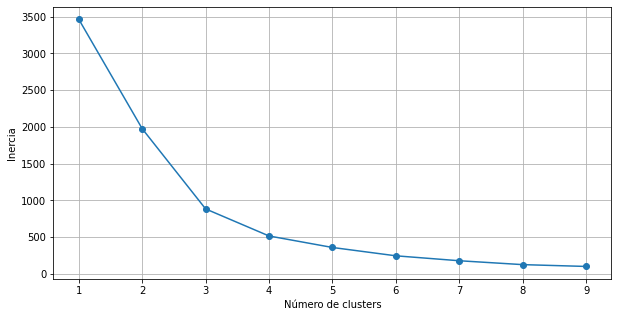

In [114]:
optimo_cant_clusters(df[["aln_length_T", "e_value_T"]], 10)

## Con base en la gráfica anterior decidimos el número de clusters. En este caso podemos ver que la gráfica se empieza a "aplanar" a partir de 3 clusters, así que podemos concluir que 5 clusters podrían ser lo suficientemente informativos.

## Aplicamos la clusterización con KMeans

In [115]:
kmeans = cluster.KMeans(n_clusters = 3)

In [116]:
kmeans.fit(df[["aln_length_T", "e_value_T"]])

KMeans(n_clusters=3)

## Agregamos a nuestros datos una columna con las etiquetas de los clusters obtenidos:

In [117]:
df["kmeans_3"] = kmeans.labels_ 

In [118]:
df[['aln_length_T', 'e_value_T']].describe()

,aln_length_T,e_value_T
count,1.731000e+03,1.731000e+03
mean,-3.283849e-17,-1.231443e-17
std,1.000289e+00,1.000289e+00
min,-3.306854e+00,-5.738252e-02
25%,-3.885093e-01,-5.738252e-02
50%,8.795507e-02,-5.738252e-02
75%,7.133146e-01,-5.738252e-02
max,1.973960e+00,2.854064e+01


### Graficamos nuetros resultados:

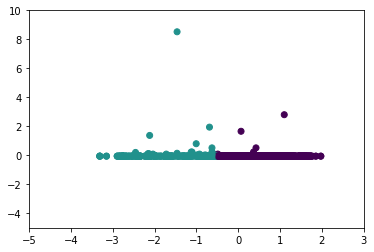

In [120]:
plt.scatter(x = df['aln_length_T'], y = df['e_value_T'], c = df['kmeans_3'])
plt.xlim(-5,3)
plt.ylim(-5,10)
plt.show()

In [123]:
df["kmeans_3"].value_counts()

0    1326
1     401
2       4
Name: kmeans_3, dtype: int64

## Analizamos las mismas columnas sin estandarizar:

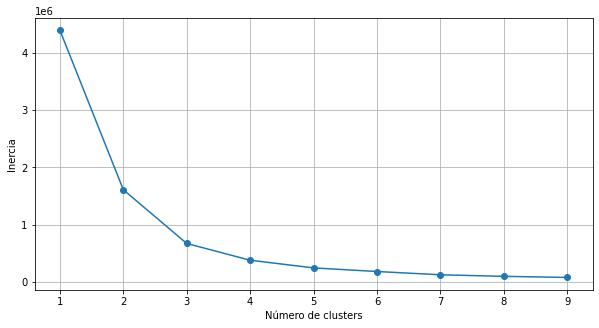

In [121]:
optimo_cant_clusters(df[["aln_length", "e_value"]], 10)

## Tomaremos 5 clusters

In [78]:
kmeans.fit(df[["aln_length", "e_value"]])

KMeans(n_clusters=5)

In [79]:
df[["aln_length", "e_value"]].describe()

,aln_length,e_value
count,1731.000000,1.731000e+03
mean,239.569613,2.006521e-07
std,50.385579,3.497756e-06
min,73.000000,0.000000e+00
25%,220.000000,6.000000e-30
50%,244.000000,2.000000e-22
75%,275.500000,8.000000e-16
max,339.000000,1.000000e-04


In [80]:
df["kmeans_5_orig"] = kmeans.labels_ 

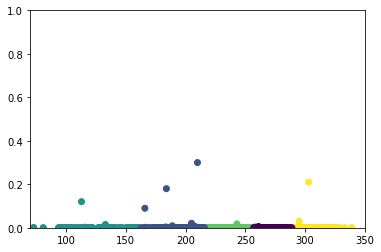

In [90]:
plt.scatter(x = df['aln_length'], y = 3000*df[['e_value']], c = df['kmeans_5_orig'])
plt.xlim(70,350)
plt.ylim(0,1)
plt.show()

In [95]:
df["kmeans_5"].value_counts()

1    854
0    673
3    199
4      3
2      2
Name: kmeans_5, dtype: int64

In [96]:
df["kmeans_5_orig"].value_counts()

3    625
0    458
1    248
4    230
2    170
Name: kmeans_5_orig, dtype: int64